In [21]:
import MEAutility as mea
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib.patches import Rectangle
# from matplotlib.collections import PatchCollection
%matplotlib inline

In [2]:
eniac = mea.SquareMEA(dim=4, pitch=200)

(-330.0, 330.0, -330.0, 330.0)

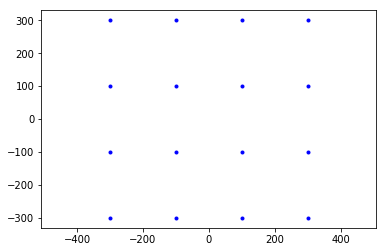

In [3]:
[plt.plot(el.position[1], el.position[2], 'b.') for el in eniac.electrodes]
plt.axis('equal')

In [4]:
eniac.set_random_currents(amp=10000)

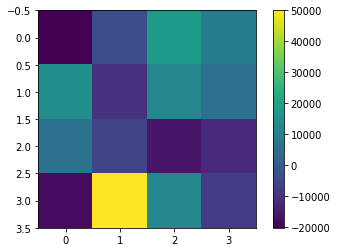

In [10]:
plt.imshow(eniac.get_current_matrix())
plt.colorbar()

In [11]:
eniac.compute_field(np.array([50, 0, 0]))

34.957570545632166

In [12]:
V_matr = np.zeros((100, 100))
y_vec = np.linspace(-300, 300, 100)
z_vec = np.linspace(-300, 300, 100)[::-1]
depth = 50

for i, y in enumerate(y_vec):
    for j, z in enumerate(z_vec):
        V_matr[i, j] = eniac.compute_field(np.array([depth, y, z]))

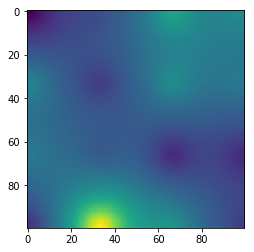

In [13]:
plt.imshow(np.transpose(V_matr))

In [9]:
eniac[3][1].set_current(50000)

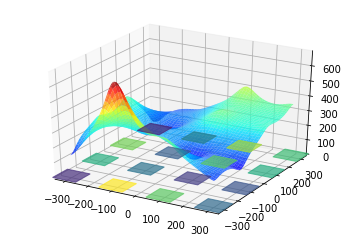

In [33]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

# Plot electrodes
verts = []
elec_size = 50
for e in range(eniac.number_electrode):
    yy = [eniac.electrodes[e].position[1] - elec_size,
          eniac.electrodes[e].position[1] - elec_size,
          eniac.electrodes[e].position[1] + elec_size,
          eniac.electrodes[e].position[1] + elec_size]
    zz = [eniac.electrodes[e].position[2] + elec_size,
          eniac.electrodes[e].position[2] - elec_size,
          eniac.electrodes[e].position[2] - elec_size,
          eniac.electrodes[e].position[2] + elec_size]
    xx = [0, 0, 0, 0]
    verts.append(list(zip(yy, zz, xx)))

yz = []

for e in range(eniac.number_electrode):
        crt_yz = [eniac.electrodes[e].position[1] - elec_size,
                  eniac.electrodes[e].position[2] - elec_size]
        yz.append(crt_yz)
        
jet = plt.get_cmap('viridis')
colors = eniac.get_currents() / np.max(np.abs(eniac.get_currents())) + 0.5
eniac_collection = []
for crt_yz, crt_color in zip(yz, colors):
        rec = Rectangle(crt_yz,
                        elec_size*2.,
                        elec_size*2.,
                        facecolor=jet(crt_color),
                        edgecolor=jet(crt_color),
                        alpha=0.7)
        ax1.add_patch(rec)
        art3d.pathpatch_2d_to_3d(rec, z=0, zdir='z')

y_plane, z_plane = np.meshgrid(y_vec, z_vec)
surf1 = ax1.plot_surface(y_plane,
                         z_plane,
                         np.transpose(V_matr + 200),
                         cmap='jet',
                         alpha=0.8,
                         zorder=10,
                         antialiased=True)